<a href="https://colab.research.google.com/github/mokymok/notebooks/blob/main/functions_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    "https://raw.githubusercontent.com/axrd/datasets/master/tipdata.csv", 
    index_col=0)
df["subtotal"]=df.total_bill-df.tip
df["tip_percentage"]=(df.tip/df.subtotal)*100

df.drop(
    [172],
    axis=0,
    inplace=True
)

df

,total_bill,tip,sex,smoker,day,time,size,subtotal,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,6.320401
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,19.124424
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,19.988578
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,16.249386
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,17.206864
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,25.616616
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,7.942812
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,9.675859
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,10.889857


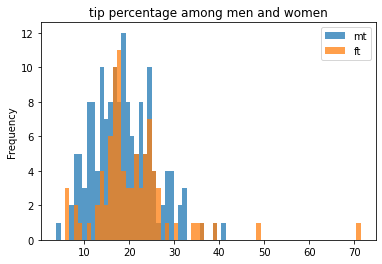

In [ ]:
#define a new dataframe with the sex and tip_percentage columns  
df_stp = pd.DataFrame(
    {
        'sex_stp':df['sex'],
        'tip_percentage_stp':df['tip_percentage']

    }
)

#define two more DataFrames that separate sexes prior to recombining in a
#third new DataFrame that we'll then use for plotting the histogram
df_stp.sort_values('sex_stp')
df_stp_f = df_stp.loc[df_stp['sex_stp']=='Female']
df_stp_m = df_stp.loc[df_stp['sex_stp']=='Male']

#modify first new df (df_stp_f) to have 1-step int-value indexes
df_stp_f.index = pd.RangeIndex(start=0, stop=87, step=1)
df_stp_f.rename(index=int).index
pd.Index(
    [0, 1, 2], 
    dtype='object'
)

#modify second new df (df_stp_m) to have 1-step int-value indexes
df_stp_m.index = pd.RangeIndex(start=0, stop=156, step=1)
df_stp_m.rename(index=int).index
pd.Index(
    [0, 1, 2], 
    dtype='object'
)

#define the final DataFrame that will be used to plot the histogram
df_tp = pd.DataFrame(
    {
        'mt':df_stp_m['tip_percentage_stp'],
        'ft':df_stp_f['tip_percentage_stp']
    }
)

#plot the histogram  
df_tp.plot.hist(
    title='tip percentage among men and women',
    bins=70,
    alpha=.75
)

In [ ]:
def index( dfindexname, df_cloumn, ele_len ):
  dfindexname.index = pd.RangeIndex(start=0, stop=ele_len, step=1)
  dfindexname.rename(index=int).index
  pd.Index(
      [0,1,2],
      dtype='object'
  )

def newdf( origcol1, origcol2, origdf1, origdf2, 
          newcol1, newcol2, dfname, dataname ):
  data_name={
          newcol1:origdf1[origcol1],
          newcol2:origdf2[origcol2]
      }
  dfname = pd.DataFrame(data_name)
  return dfname

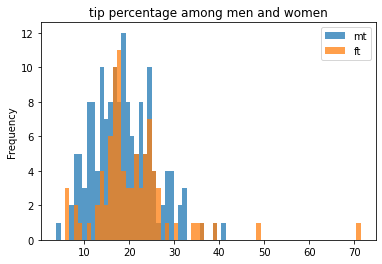

In [ ]:
#define a new dataframe with the sex and tip_percentage columns  
df_new_1 = newdf(
    'sex','tip_percentage', 
    df, df, 
    's_stp', 't_stp', 
    'df_new_1', 'data_1'
    )

#define two more DataFrames that separate sexes prior to recombining in a
#third new DataFrame that we'll then use for plotting the histogram
df_stp.sort_values('sex_stp')
df_stp_f = df_stp.loc[df_stp['sex_stp']=='Female']
df_stp_m = df_stp.loc[df_stp['sex_stp']=='Male']

#modify first new df (df_stp_f) to have 1-step int-value indexes
index(df_stp_f, 'sex_stp', 87)

#modify second new df (df_stp_m) to have 1-step int-value indexes
index(df_stp_m, 'sex_stp', 156)

#define the final DataFrame that will be used to plot the histogram
df_new_2 = newdf(
    'tip_percentage_stp','tip_percentage_stp', 
    df_stp_m, df_stp_f, 
    'mt', 'ft', 
    'df_new_2', 'data_2'
    )

#plot the histogram  
df_new_2.plot.hist(
    title='tip percentage among men and women',
    bins=70,
    alpha=.75
)

In [ ]:
def plothist(
    ele_len_df_1, ele_len_df_2,
    origcol1, origcol2, origdf1, origdf2, newcol1, newcol2, df1name, dataname,
    sortvar1, sortvar2, df2name, df3name,
    findfname, findfcol1, findfcol2, findataname,
    histtitle, histbins, histalpha):
  #define a new dataframe with the sex and tip_percentage columns  
  df1name = newdf(
    origcol1, origcol2, 
    origdf1, origdf2, 
    newcol1, newcol2, 
    df1name, dataname
    )

  #define two more DataFrames that separate sexes prior to recombining in a
  #third new DataFrame that we'll then use for plotting the histogram
  df1name.sort_values(newcol1)
  df2name = df1name.loc[df1name[newcol1]==sortvar1]
  df3name = df1name.loc[df1name[newcol1]==sortvar2]

  #modify first new df (df_stp_f) to have 1-step int-value indexes
  index(df2name, newcol1, ele_len_df_1)

  #modify second new df (df_stp_m) to have 1-step int-value indexes
  index(df3name, newcol1, ele_len_df_2)

  #define the final DataFrame that will be used to plot the histogram
  findfname = newdf(
    newcol2, newcol2, 
    df2name, df3name, 
    findfcol1, findfcol2, 
    findfname, findataname
    )

  #plot the histogram  
  findfname.plot.hist(
    title=histtitle,
    bins=histbins,
    alpha=histalpha
)

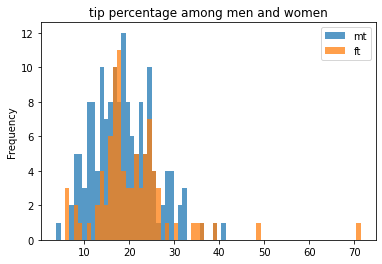

In [ ]:
plothist(
    'sex', 'tip_percentage', df, df,
    'sex_new', 'tp_new', 'df_stp_new', 'df_stp_new_data',
    'Male', 'Female', 'dfstpm', 'dfstpf', 156, 87, 
    'dfsplit', 'mt', 'ft', 'finaldata',
    'tip percentage among men and women', 70, 0.75
)

In [ ]:
def index( 
    dfindexname, 
    df_column, 
    ele_len):
    '''Orders disorderly elements in a DataFrame based on current indexing.'''
    dfindexname.index = pd.RangeIndex(start=0, stop=ele_len, step=1)
    dfindexname.rename(index=int).index
    pd.Index(
      [0,1,2],
      dtype='object'
  )

def new2df( 
    origcol1, origcol2, 
    origdf1, origdf2, 
    newcol1, newcol2, 
    dfname, dataname):
    '''Builds a new 2-column Pandas DataFrame utilizing data from a 
    previous DataFrame.'''
    data_name={
          newcol1:origdf1[origcol1],
          newcol2:origdf2[origcol2]
      }
    dfname = pd.DataFrame(data_name)
    return dfname

def plothist(
    origcol1, origcol2, origdf1, origdf2, newcol1, newcol2, df1name, dataname,
    sortvar1, sortvar2, df2name, df3name, ele_len_df_1, ele_len_df_2,
    findfname, findfcol1, findfcol2, findataname,
    histtitle, histbins, histalpha):
    '''Will plot a Pandas histogram of two sets of data within a single Pandas
    DataFrame.  Ideally, working with one column with int or float data and
    another with str data with 2 different values.  
    
    I built this function so that using a dataset with more str values is possible, 
    though you would have to append the args of the function with something 
    along the lines of "df4name", "sortvar3", and "findfcol3", and then copy the
    lines I wrote with the new arg names.  You would also have to append the 
    new2df() function defined above to account for more columns, adding args to
    the origcol, origdf, and newcol argsets.'''

#define a new dataframe with the columns to be used from the original DataFrame  
    df1name = new2df(
      origcol1, origcol2, 
      origdf1, origdf2, 
      newcol1, newcol2, 
      df1name, dataname
    )

#define more DataFrames that separate the str values prior to recombining in a
#final new DataFrame that we'll then use for plotting the histogram
    df1name.sort_values(newcol1)
    df2name = df1name.loc[df1name[newcol1]==sortvar1]
    df3name = df1name.loc[df1name[newcol1]==sortvar2]

#modify first new df to have 1-step int-value indexes
    index(df2name, newcol1, ele_len_df_1)

#modify second new df to have 1-step int-value indexes
    index(df3name, newcol1, ele_len_df_2)

#define the final DataFrame that will be used to plot the histogram
    findfname = new2df(
      newcol2, newcol2, 
      df2name, df3name, 
      findfcol1, findfcol2, 
      findfname, findataname
    )

  #plot the histogram  
    findfname.plot.hist(
      title=histtitle,
      bins=histbins,
      alpha=histalpha
)

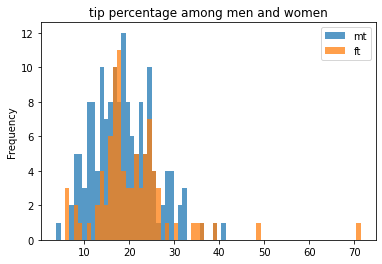

In [ ]:
plothist(
    'sex', 'tip_percentage', df, df,
    'sex_new', 'tp_new', 'df_stp_new', 'df_stp_new_data',
    'Male', 'Female', 'dfstpm', 'dfstpf', 156, 87, 
    'dfsplit', 'mt', 'ft', 'finaldata',
    'tip percentage among men and women', 70, 0.75
)